In [3]:
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train,y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [10]:
x_train[0].shape

(28, 28)

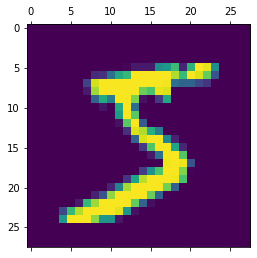

In [32]:
plt.matshow(x_train[0]);

In [16]:
y_train[2]

4

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
x_train=x_train/255
x_test=x_test/255

In [26]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [27]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [28]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 497us/step - loss: 0.4665 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 1s 493us/step - loss: 0.3034 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 1s 520us/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 509us/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 1s 488us/step - loss: 0.2668 - accuracy: 0.9257


In [29]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 450us/step - loss: 0.2657 - accuracy: 0.9258


[0.26571643352508545, 0.9258000254631042]

In [35]:
y_predicted=model.predict(x_test_flatten)

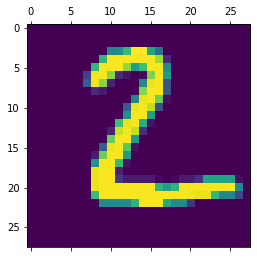

In [39]:
plt.matshow(x_test[1]);

In [40]:
y_predicted[1]

array([4.64067429e-01, 1.24619305e-02, 9.99497235e-01, 3.20147097e-01,
       4.20731811e-10, 7.96589851e-01, 9.03320014e-01, 8.02264993e-13,
       1.33304417e-01, 3.21160898e-09], dtype=float32)

In [41]:
np.argmax(y_predicted[1])

2

In [42]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    8,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,   10,  930,   16,    7,    2,   13,    9,   38,    4],
       [   4,    0,   20,  922,    0,   21,    2,   11,   22,    8],
       [   1,    1,    5,    2,  906,    0,   11,    4,   10,   42],
       [   9,    3,    5,   38,    9,  760,   18,    8,   36,    6],
       [  12,    3,    7,    1,    7,   10,  914,    2,    2,    0],
       [   1,    5,   24,    7,    5,    0,    0,  950,    3,   33],
       [   5,   10,    6,   22,    9,   20,   10,   12,  874,    6],
       [   9,    7,    2,   12,   24,    5,    0,   18,    7,  925]])>

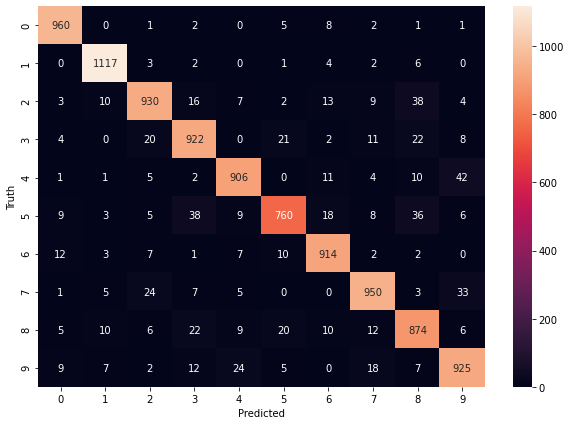

In [49]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [50]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 562us/step - loss: 0.2771 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 1s 563us/step - loss: 0.1253 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 1s 545us/step - loss: 0.0878 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 589us/step - loss: 0.0666 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 1s 544us/step - loss: 0.0515 - accuracy: 0.9840


In [51]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 595us/step - loss: 0.0876 - accuracy: 0.9734


[0.08755899965763092, 0.9733999967575073]

In [53]:
y_predicted=model.predict(x_test_flatten)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

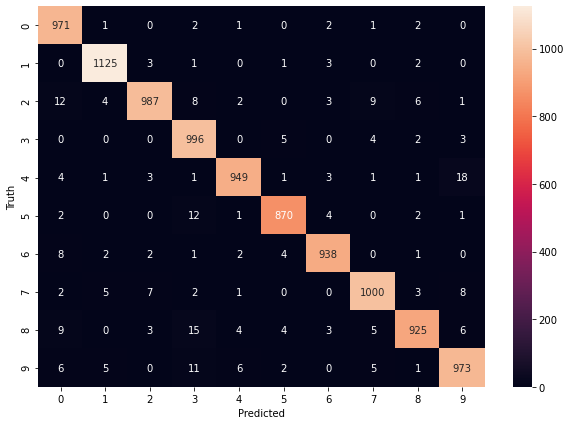

In [54]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [56]:
#if i want to flatten array along with the neural network building I can use keras library
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 609us/step - loss: 0.2680 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 1s 564us/step - loss: 0.1239 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 1s 736us/step - loss: 0.0873 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 1s 735us/step - loss: 0.0667 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 607us/step - loss: 0.0534 - accuracy: 0.9832
